# Matemática para Ciencia de los Datos
- Documento base:  https://nbviewer.jupyter.org/github/buruzaemon/svd/blob/master/01_SVD_visualizing_data.ipynb


# Singular Value Descomposition (SVD)

Singular value decomposition factoriza una matriz $X \in \mathbb{R}^{m \times n}$  en:

* Matriz $U \in \mathbb{R}^{m \times m}$ son los vectores singular-izquierdos de $X$, donde las columnas son el conjunto de auto-vectores ortonormales de  $X \, X^{T}$.
* Matriz diagonal $\Sigma$ con entradas $\sigma \in \mathbb{R}$ que son los valores singulares  no-negativos de $X$.
* Matriz $V \in \mathbb{R}^{n \times n}$ son los vectores singular-derechos de $X$, donde las columnas son el conjunto de auto-vectores ortonormales de  $X^{T} \, X$.

tal que, 

\begin{align}
  X &= U \, \Sigma \, V^{T}
\end{align}

Las dimensiones de cada una de las matrices que factorizan $X \in \mathbb{R}^{m \times n}$ son:

![](https://drive.google.com/uc?id=1sVuy8_b_P9hZJF9zsrpB3j6d0EithUtR)


Con respecto a la relación con los auto-valores y auto-vectores: 

* $U$ corresponde a los auto-vectores de $X \, X^{T}$
* $V$ corresponde a los auto-vectores de $X^{T} \, X$
* $\Sigma$ corresponde a los auto-valores de $X \, X^{T}$ o $X^{T} \, X$, que son los mismos.


## Ejemplo: Conjunto de datos Iris

[Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

Los datos son multivariados, con 150 mediciones de 4 atributos (length and width cm de ambos:  sepal and petal) en tres distintas especies de Iris. De las 150 mediciones, hay 50 mediciones para _Iris setosa_, _Iris versicolor_, e _Iris virginica_.

[Scikit Learn's `datasets`](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) incluye el conjunto de datos Iris.

![](https://drive.google.com/uc?id=125KRc9v-vQ5dVfO2IR7jkqyRChoDtCHI)

Fuente: https://www.researchgate.net/publication/265877256_How_plants_grow_and_move/figures?lo=1


In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import sklearn.datasets
import sklearn.preprocessing



In [3]:
iris = sklearn.datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)

X_zscaled = (X - X.mean()) / X.std(ddof=1)

Y = pd.DataFrame(iris.target, columns=['target'])
Y['species'] = Y.apply(lambda r: iris.target_names[r])

print("Dimensiones de la matriz: (filas,columnas)", X.shape)
print(X.head(5))
print(X_zscaled )

Dimensiones de la matriz: (filas,columnas) (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.897674          1.015602          -1.335752         -1.311052
1            -1.139200         -0.131539          -1.335752         -1.311052
2            -1.380727          0.327318          -1.392399         -1.311052
3            -1.501490          0.097889          -1.279104         -1.311052
4            -1.018437          1.245030          -1.335752         -1.311052
..                 ...  

In [4]:
U_iris, S_iris, Vt_iris = np.linalg.svd(X_zscaled)

#### $U$: vectores singular-izquierdos de $X$

Las filas de $U$ corresponden a las filas de la matriz original de datos $X$, mientras que las columnas son el conjunto de auto-vectores ordenados, ortonormales de  $X \, X^{T}$.

In [5]:
print('La matriz U tiene {} filas, {} columnas\n'.format(*U_iris.shape))

print('{}'.format(pd.DataFrame(U_iris).head(5)))

La matriz U tiene 150 filas, 150 columnas

        0         1         2         3         4         5         6    \
0 -0.108240 -0.040996  0.027219  0.013711 -0.093983 -0.067347 -0.132536   
1 -0.099458  0.057573  0.050003  0.058436  0.077725  0.142448  0.034067   
2 -0.112996  0.029200 -0.009421  0.016098 -0.030840 -0.037345  0.027905   
3 -0.109897  0.051019 -0.019457 -0.037417 -0.032518 -0.001968 -0.011684   
4 -0.114220 -0.055242 -0.003354 -0.020379  0.984502 -0.018293 -0.013244   

        7         8         9    ...       140       141       142       143  \
0 -0.086292 -0.132836 -0.082586  ...  0.059302  0.075102 -0.003320  0.076308   
1  0.038986 -0.066637 -0.020602  ...  0.026756  0.018141 -0.057745  0.055986   
2 -0.047820 -0.001796 -0.069891  ...  0.047583 -0.061242  0.126298  0.079624   
3 -0.036485 -0.028313 -0.061476  ...  0.181042  0.270307  0.026635  0.072272   
4 -0.012026 -0.005699 -0.007679  ...  0.007513  0.009317  0.007775  0.004612   

        144       145    

#### $V$: vectores sigular-derechos de $X$

[`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) retorna  $V^{T}$ en lugar de $V$, tal que las columnas de $V^{T}$ corresponden a la matriz orginal de datos de $X$. Y donde las filas son el conjunto de auto-vectores ordenados, ortonormales de $X^{T} \, X$.

In [6]:
print('La matriz Vt tiene {} filas, {} columnas\n'.format(*Vt_iris.shape))

print('{}'.format(pd.DataFrame(Vt_iris).head()))

La matriz Vt tiene 4 filas, 4 columnas

          0         1         2         3
0  0.521066 -0.269347  0.580413  0.564857
1 -0.377418 -0.923296 -0.024492 -0.066942
2  0.719566 -0.244382 -0.142126 -0.634273
3  0.261286 -0.123510 -0.801449  0.523597


#### $\Sigma$: valores singulares de $X$

Los elementos $\sigma_{i}$ de la matriz diagonal $\Sigma$ son los valores sigulares  no-negativos de la matriz $X$, los cuales son realmente las raíces cuadradas de los auto-valores no-zero de $X^{T} \, X$ (y también para $X \, X^{T}$). Estos valores singulares pueden ser usados para determinar la cantidad de varianza $X^{\prime}$ explicada de la matriz de datos original $X$ cuando reducimos las dimensiones para encontrar una aproximación de rango inferior.

\begin{align}
   X^{\prime}_{k} &=  U_{k} \, \Sigma_{k} \, V^{T}_{k} \\
                           &\approx X_{r} & \text{ donde } rank(X^{\prime}) = k \lt rank(X) = r
\end{align}

La cantidad de varianza que la aproximación del rango reducido  $X^{\prime}_{k}$ explica de  $X_{r}$ es:

\begin{align}
  \text{suma de varianza explicada} &= \frac{\sum_{j=1}^{k} \sigma_{j}^{2}}{\sum_{i=1}^{r} \sigma_{i}^{2}}
\end{align}

**NOTE**: [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) realmente retorna un $\Sigma$ que no es una matriz diagonal, sino una lista de las entradas de la diagonal.

In [7]:
print("Vector Sigma tiene: ", len(S_iris), " elementos")
print(S_iris)

Vector Sigma tiene:  4  elementos
[20.85320538 11.67007028  4.6761923   1.75684679]


In [8]:
num_sv_iris = np.arange(1, S_iris.size+1)

cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]

Se grafica la suma de la varianza explicada como una función del número de valores singulares usados cuando reducimos el rango para encontrar una matriz de rango-inferior $X^{\prime}$ para aproximar $X$. Lo cual da pistas de cuántas dimensiones se podrían usar.

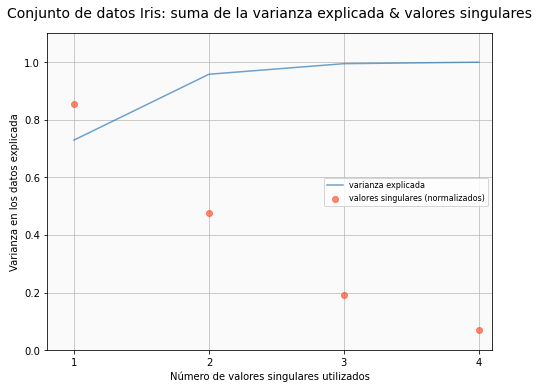

In [9]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='varianza explicada',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv_iris,
            sklearn.preprocessing.normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='valores singulares (normalizados)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Número de valores singulares utilizados')
ax.set_ylabel('Varianza en los datos explicada')
ax.set_title('Conjunto de datos Iris: suma de la varianza explicada & valores singulares',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

#### Reducción de dimensión

A juzgar por la curva que representa la suma de la varianza explicada en la figura anterior, se puede ver que:

* con 2 valores singulares, cerca de 96.5% de la varianza de $X$ puede ser explicada
* con 3 valores singulares, ese número llega hasta aproximadamente 99.8%

Ahora se grafica utilizando los primeros 2 valores singulares para representar los datos en los ejes $x$ y $y$, respectivamente.

In [10]:
idx_setosa = np.where(iris.target==0)[0]
idx_versicolor = np.where(iris.target==1)[0]
idx_virginica = np.where(iris.target==2)[0]

setosa_x = U_iris[idx_setosa, 0]
setosa_y = U_iris[idx_setosa, 1]

versicolor_x = U_iris[idx_versicolor, 0]
versicolor_y = U_iris[idx_versicolor, 1]

virginica_x = U_iris[idx_virginica, 0]
virginica_y = U_iris[idx_virginica, 1]

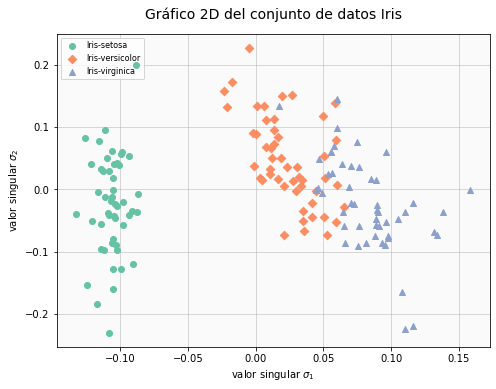

In [11]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_x,
            setosa_y,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(versicolor_x,
            versicolor_y,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(virginica_x,
            virginica_y,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'valor singular $\sigma_{1}$')
ax.set_ylabel(r'valor singular $\sigma_{2}$')
ax.set_title('Gráfico 2D del conjunto de datos Iris',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

**Observación final:**

Se logra visualizar el conjunto de datos original que estaba en 4D en 2D usando las primeras dos columnas de valores singulares de $U$, matriz de vectores singular-izquierda, se logra ver que hay una clara separación para las clases _Iris setosa_ y las otras. De otra manera, la diferenciación entre _Iris versicolor_ e _Iris virginica_ no parece clara.


## Ejemplo adicional en imágenes

Detalles de img:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2697x2193 at 0x27700951C48>
Detalles de imggray:  <PIL.Image.Image image mode=LA size=2697x2193 at 0x277006E7048>



Resolución de la imagen original:  (2193, 2697)





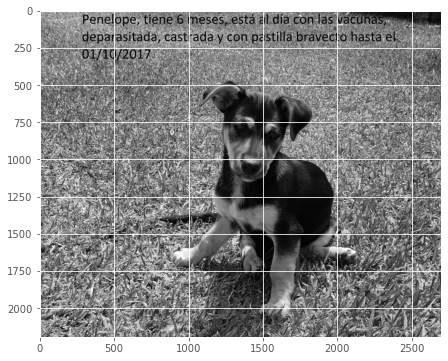




Dimensiones de U: (2193, 2193)
Dimensiones de D: (2193,)
Dimensiones de V: (2697, 2697)





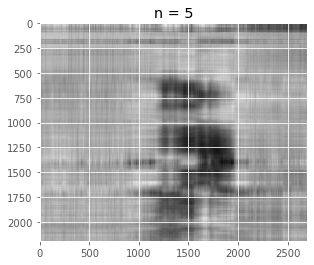

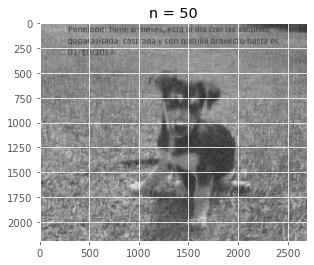

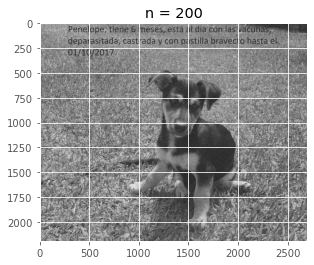

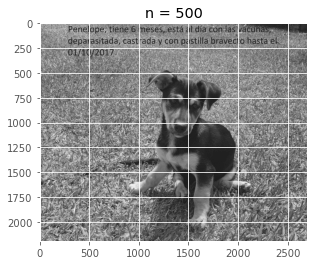

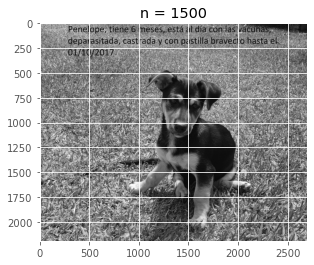

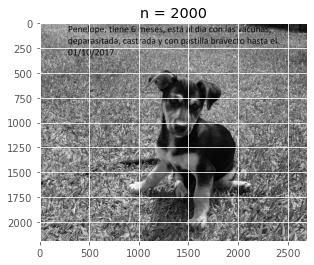

In [12]:
from PIL import Image

plt.style.use('ggplot')
img = Image.open('perritaejemplo.jpg')
print("Detalles de img: ", img)
# convert image to grayscale
imggray = img.convert('LA')
print("Detalles de imggray: ", imggray)

# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)

# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

print("\n\n")
print("Resolución de la imagen original: ", imgmat.shape)
print("\n\n")

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

U, D, V = np.linalg.svd(imgmat)

print("\n\n")
print("Dimensiones de U:", U.shape)
print("Dimensiones de D:", D.shape)
print("Dimensiones de V:", V.shape)
print("\n\n")

for i in [5, 50, 200, 500, 1500, 2000]:
    #reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    reconstimg = np.matmul( np.matmul( np.matrix(U[:, :i]) , np.diag(D[:i]) ) , np.matrix(V[:i, :]) )
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()